In [1]:
%load_ext autoreload
%autoreload 2
import os
import sys
module_path = os.path.abspath("/home/neurobook/Desktop/Research/_dev/conic-tools/") 
sys.path.insert(0, module_path)
module_path = os.path.abspath("/home/neurobook/Desktop/Research/_dev/PySpike/") 
sys.path.insert(0, module_path)

In [2]:
import pickle
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt

In [3]:
from conic_tools.analysis.signals import SpikeList, StateMatrix

In [4]:
# Load datasets
data = loadmat('/home/neurobook/Desktop/Research/MEA-data/data/n1-DIV17-01.mat')
ids = data['Channels'][0]
times = data['Times'][0]
spk_times = [(i, times[idx]*1000) for idx, i in enumerate(ids)]
spk_ids = np.unique(ids)
sl_n1 = SpikeList(spk_times, spk_ids)

data = loadmat('/home/neurobook/Desktop/Research/MEA-data/data/n2-DIV17-01.mat')
ids = data['Channels'][0]
times = data['Times'][0]
spk_times = [(i, times[idx]*1000) for idx, i in enumerate(ids)]
spk_ids = np.unique(ids)
sl_n2 = SpikeList(spk_times, spk_ids)

data = loadmat('/home/neurobook/Desktop/Research/MEA-data/data/n3-DIV17-01.mat')
ids = data['Channels'][0]
times = data['Times'][0]
spk_times = [(i, times[idx]*1000) for idx, i in enumerate(ids)]
spk_ids = np.unique(ids)
sl_n3 = SpikeList(spk_times, spk_ids)

In [5]:
# Time slice (first 10 seconds)
sl_n1_small = sl_n1.time_slice(t_start=0., t_stop=10000.)
sl_n2_small = sl_n2.time_slice(t_start=0., t_stop=10000.)
sl_n3_small = sl_n3.time_slice(t_start=0., t_stop=10000.)

To visualize the difference in state-space geometry between the different experimental conditions, we need to project them into the same axes. We will start by merging and annotating a subset (for testing purposes).

In [6]:
states1 = sl_n1_small.filter_spiketrains(dt=0.1, tau=20.)
sm_n1_small = StateMatrix(states1, label="n1-states", state_var="filtered-spikes", population="n1")

states2 = sl_n2_small.filter_spiketrains(dt=0.1, tau=20.)
sm_n2_small = StateMatrix(states2, label="n2-states", state_var="filtered-spikes", population="n2")

states3 = sl_n3_small.filter_spiketrains(dt=0.1, tau=20.)
sm_n3_small = StateMatrix(states3, label="n3-states", state_var="filtered-spikes", population="n3")


Compiling activity matrix from SpikeList


100%|██████████| 64/64 [01:28<00:00,  1.38s/it]



Compiling activity matrix from SpikeList


100%|██████████| 64/64 [01:21<00:00,  1.27s/it]



Compiling activity matrix from SpikeList


100%|██████████| 64/64 [01:11<00:00,  1.11s/it]


In [8]:
with open("../../data/states1_small.pkl", 'wb') as fp:
    pickle.dump(sm_n1_small, fp)

with open("../../data/states2_small.pkl", "wb") as fp:
    pickle.dump(sm_n2_small, fp)
    
with open("../../data/states3_small.pkl", "wb") as fp:
    pickle.dump(sm_n3_small, fp)

In [9]:
# Now, we merge the 3 state matrices into one 
all_states = np.concatenate((states1, states2, states3), axis=1)

# and create a list of labels
labels = [0 for _ in range(sm_n1_small.matrix.shape[1])]
labels.extend([1 for _ in range(sm_n2_small.matrix.shape[1])])
labels.extend([2 for _ in range(sm_n3_small.matrix.shape[1])])

[states.py:159 - INFO] Dimensionality reduction with Principal Component Analysis
[states.py:164 - INFO] Elapsed time: 1.8079760074615479 s
[states.py:165 - INFO] Explained Variance (first 3 components): [0.46547355 0.204565   0.12552145]


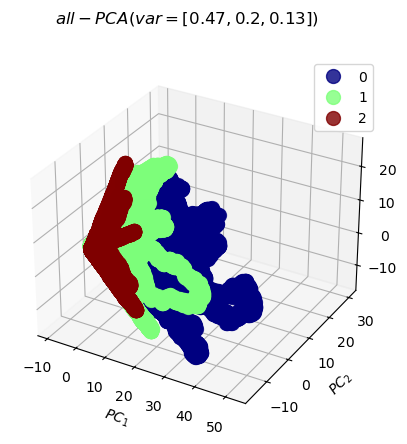

In [10]:
from conic_tools.analysis.metrics.states import dimensionality_reduction

dimensionality_reduction(all_states, data_label='all', labels=labels, metric='PCA', standardize=True, plot=True, colormap='jet', display=True, save=False)

In [11]:
states1 = sl_n1.filter_spiketrains(dt=0.1, tau=20.)
sm_n1 = StateMatrix(states1, label="n1-states", state_var="filtered-spikes", population="n1")

states2 = sl_n2.filter_spiketrains(dt=0.1, tau=20.)
sm_n2 = StateMatrix(states2, label="n2-states", state_var="filtered-spikes", population="n2")

states3 = sl_n3.filter_spiketrains(dt=0.1, tau=20.)
sm_n3 = StateMatrix(states3, label="n3-states", state_var="filtered-spikes", population="n3")


Compiling activity matrix from SpikeList


100%|██████████| 64/64 [40:08<00:00, 37.63s/it]



Compiling activity matrix from SpikeList


100%|██████████| 64/64 [38:34<00:00, 36.16s/it]



Compiling activity matrix from SpikeList


100%|██████████| 64/64 [39:26<00:00, 36.98s/it]


In [12]:
with open("../../data/states1.pkl", 'wb') as fp:
    pickle.dump(sm_n1, fp)

with open("../../data/states2.pkl", "wb") as fp:
    pickle.dump(sm_n2, fp)
    
with open("../../data/states3.pkl", "wb") as fp:
    pickle.dump(sm_n3, fp)

In [13]:
# Now, we merge the 3 state matrices into one 
# Here, we also downsample and mix
all_states = np.concatenate((states1[::10], states2[::10], states3[::10]), axis=1)
idx = np.random.permutation(all_states.shape[1])


# and create a list of labels
labels = [0 for _ in range(states1[::10].shape[1])]
labels.extend([1 for _ in range(states2[::10].shape[1])])
labels.extend([2 for _ in range(states3[::10].shape[1])])

In [16]:
new_labels = [labels[x] for x in idx]

[states.py:159 - INFO] Dimensionality reduction with Principal Component Analysis
[states.py:164 - INFO] Elapsed time: 34.97272992134094 s
[states.py:165 - INFO] Explained Variance (first 3 components): [0.34626648 0.21588036 0.19677169]


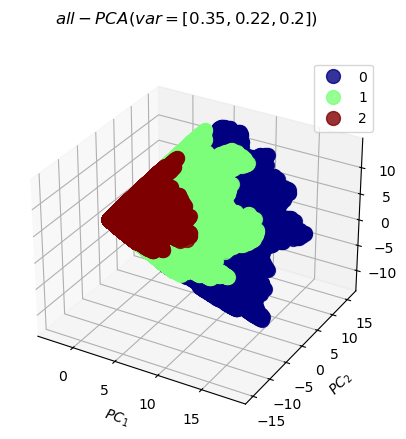

In [18]:
dimensionality_reduction(all_states[:, idx], data_label='all', labels=new_labels, metric='PCA', standardize=True, plot=True, colormap='jet', display=True, save="./plots/pca-combined.png")

In [1]:
%load_ext autoreload
%autoreload 2
import os
import sys
module_path = os.path.abspath("/home/neurobook/Desktop/Research/_dev/conic-tools/") 
sys.path.insert(0, module_path)
module_path = os.path.abspath("/home/neurobook/Desktop/Research/_dev/PySpike/") 
sys.path.insert(0, module_path)
import pickle
import numpy as np
import umap
import NMLfunc as nml

In [2]:
# load dataset
with open("../../data/states1_small.pkl", 'rb') as fp:
    sm_n1 = pickle.load(fp)

with open("../../data/states2_small.pkl", "rb") as fp:
    sm_n2 = pickle.load(fp)
    
with open("../../data/states3_small.pkl", "rb") as fp:
    sm_n3 = pickle.load(fp)
    
states1 = sm_n1.matrix
states2 = sm_n2.matrix
states3 = sm_n3.matrix

In [3]:
# Now, we merge the 3 state matrices into one 
# Here, we also downsample and mix
all_states = np.concatenate((states1, states2, states3), axis=1)
idx = np.random.permutation(all_states.shape[1])


# and create a list of labels
labels = [0 for _ in range(states1.shape[1])]
labels.extend([1 for _ in range(states2.shape[1])])
labels.extend([2 for _ in range(states3.shape[1])])

new_labels = [labels[x] for x in idx]

In [4]:
### Fit embedding
EMBD = 'UMAP'
SE = umap.UMAP(n_components=5, metric='cosine', n_neighbors=70, random_state=42)
x_embd = SE.fit_transform(all_states.T)
x_embd = nml.centre_scale(x_embd)

In [5]:
x_embd = SE.fit_transform(all_states.T)
x_embd = nml.centre_scale(x_embd)

<Figure size 640x480 with 0 Axes>

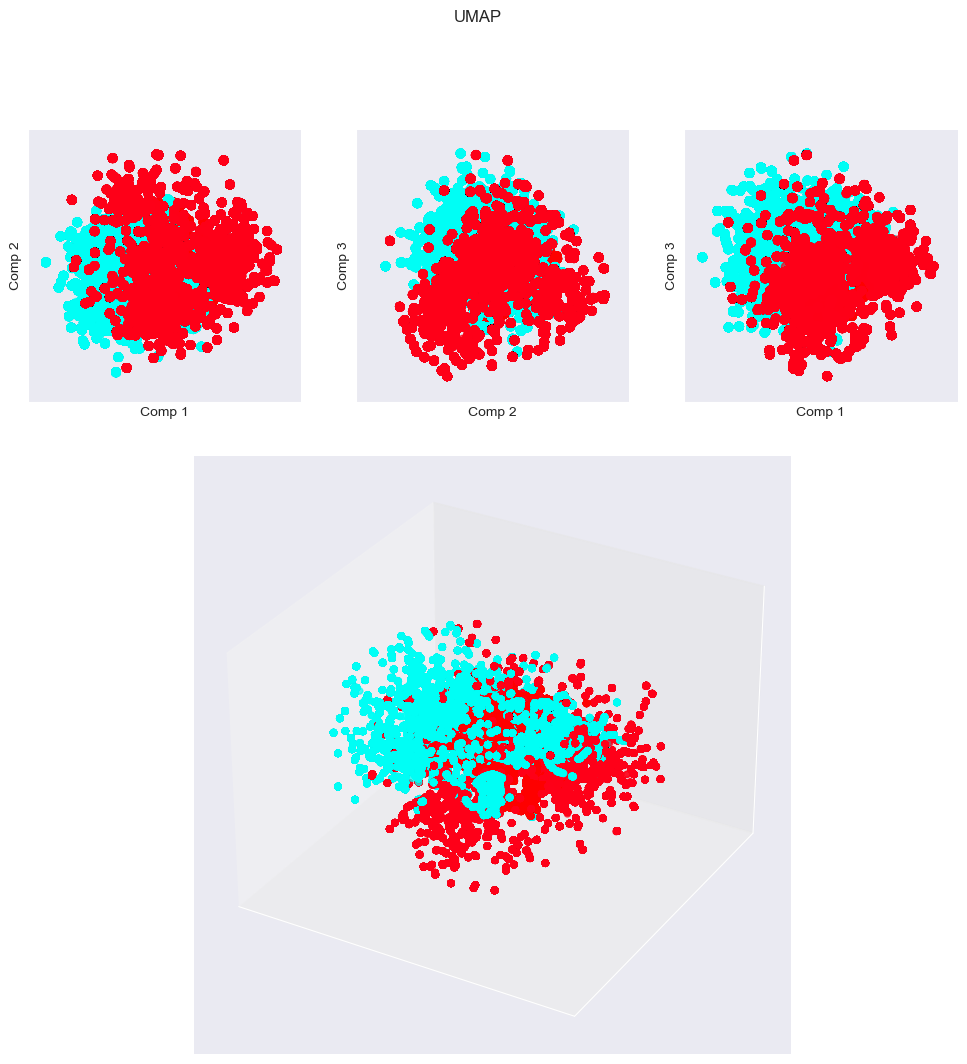

In [6]:
from auxiliary import plot_embedding

AXIS_LIM = np.max(x_embd)
plot_embedding(x_embd, 1, labels, AXIS_LIM, title="UMAP", display=True, save='./plots/comparison-umap.png')

<Figure size 640x480 with 0 Axes>

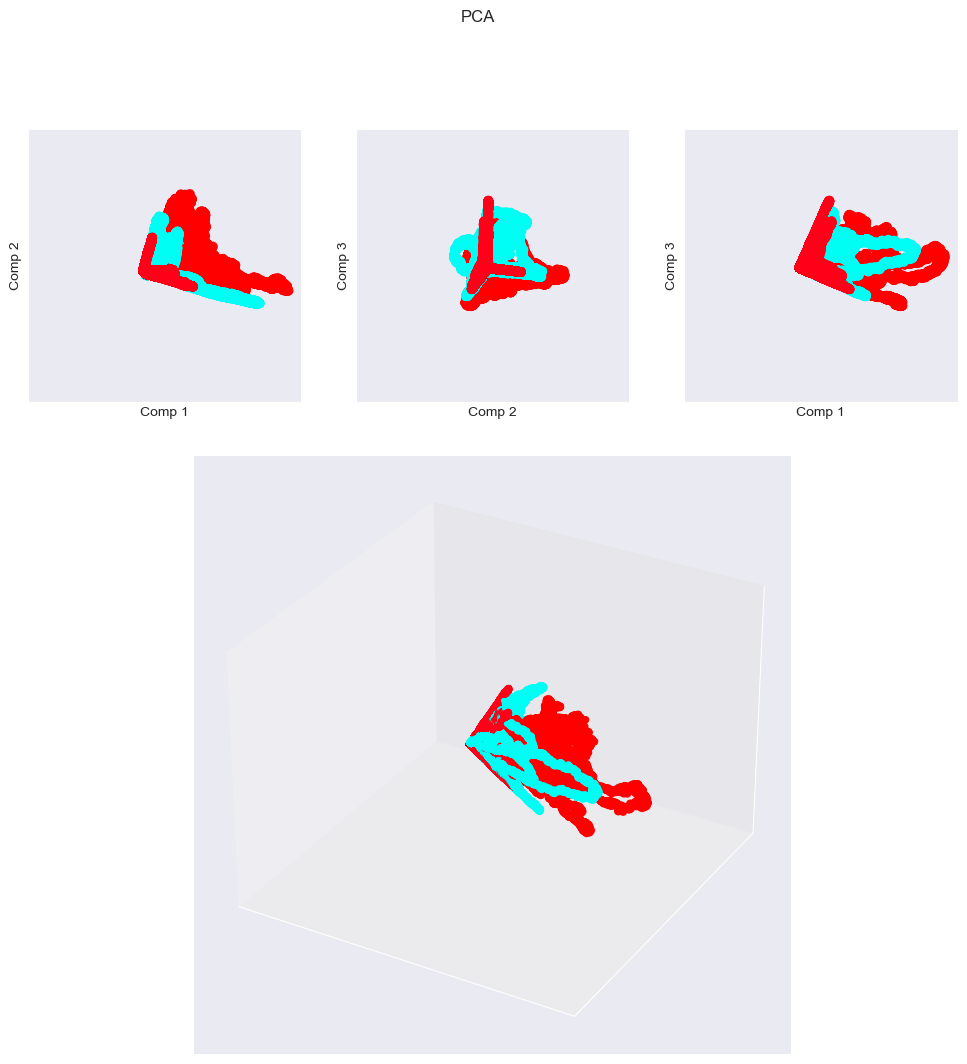

In [7]:
### Fit embedding
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
x_embd2 = pca.fit_transform(all_states.T)
x_embd2 = x_embd2 / np.max(np.abs(x_embd2)) # normalise the values
AXIS_LIM = np.max(x_embd2)

plot_embedding(x_embd2, 1, labels, AXIS_LIM, title="PCA", display=True, save='./plots/comparison-pca.png')